In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d0 = pd.read_csv('vid18_180219.dat', delimiter = ',')
df1 = pd.DataFrame(d0)
df1["Date"] = pd.to_datetime(df1.TIMESTAMP)
df1 = df1.filter(["Date", "AirTC_Avg"], axis=1)
df1.head()

,Date,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [3]:
df1["Year"]  = df1["Date"].dt.year
df1["Month"] = df1["Date"].dt.month
df1["Day"]   = df1["Date"].dt.day
df1["Hour"]  = df1["Date"].dt.hour
df1.head(), df1.tail()

(                 Date  AirTC_Avg  Year  Month  Day  Hour
 0 2018-05-11 20:10:00      23.50  2018      5   11    20
 1 2018-05-11 20:20:00      22.96  2018      5   11    20
 2 2018-05-11 20:30:00      22.73  2018      5   11    20
 3 2018-05-11 20:40:00      22.40  2018      5   11    20
 4 2018-05-11 20:50:00      22.46  2018      5   11    20,
                      Date  AirTC_Avg  Year  Month  Day  Hour
 40655 2019-02-18 06:50:00      3.699  2019      2   18     6
 40656 2019-02-18 07:00:00      3.492  2019      2   18     7
 40657 2019-02-18 07:10:00      3.387  2019      2   18     7
 40658 2019-02-18 07:20:00      3.243  2019      2   18     7
 40659 2019-02-18 07:30:00      3.552  2019      2   18     7)

In [4]:
df2 = pd.DataFrame(df1[df1["Date"] >= "2018-11-1"])
df2 = df2.reset_index(drop=True)
df2.head(), df2.tail()

(                 Date  AirTC_Avg  Year  Month  Day  Hour
 0 2018-11-01 00:00:00       9.13  2018     11    1     0
 1 2018-11-01 00:10:00       8.89  2018     11    1     0
 2 2018-11-01 00:20:00       8.66  2018     11    1     0
 3 2018-11-01 00:30:00       8.52  2018     11    1     0
 4 2018-11-01 00:40:00       8.47  2018     11    1     0,
                      Date  AirTC_Avg  Year  Month  Day  Hour
 15720 2019-02-18 06:50:00      3.699  2019      2   18     6
 15721 2019-02-18 07:00:00      3.492  2019      2   18     7
 15722 2019-02-18 07:10:00      3.387  2019      2   18     7
 15723 2019-02-18 07:20:00      3.243  2019      2   18     7
 15724 2019-02-18 07:30:00      3.552  2019      2   18     7)

In [5]:
df2["TMean"] = round(df2.groupby(["Year", "Month", "Day", "Hour"]).transform(np.mean),1)
df2["Tmax"]  = round(df2.groupby(["Year","Month","Day"])["AirTC_Avg"].transform(np.max), 1)
df2["Tmin"]  = round(df2.groupby(["Year","Month","Day"])["AirTC_Avg"].transform(np.min), 1)
df2.head()

,Date,AirTC_Avg,Year,Month,Day,Hour,TMean,Tmax,Tmin
0,2018-11-01 00:00:00,9.13,2018,11,1,0,8.7,29.6,6.1
1,2018-11-01 00:10:00,8.89,2018,11,1,0,8.7,29.6,6.1
2,2018-11-01 00:20:00,8.66,2018,11,1,0,8.7,29.6,6.1
3,2018-11-01 00:30:00,8.52,2018,11,1,0,8.7,29.6,6.1
4,2018-11-01 00:40:00,8.47,2018,11,1,0,8.7,29.6,6.1


In [6]:
#Para eliminar los duplicados para que quede por hora en vez de día
df2 = df2.drop_duplicates(subset=["Hour", "Day", "Month", "Year"])
df2 = df2.reset_index(drop=True)
df2.head(25)

,Date,AirTC_Avg,Year,Month,Day,Hour,TMean,Tmax,Tmin
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,29.6,6.1
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,29.6,6.1
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,29.6,6.1
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,29.6,6.1
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,29.6,6.1
5,2018-11-01 05:00:00,7.261,2018,11,1,5,7.3,29.6,6.1
6,2018-11-01 06:00:00,7.723,2018,11,1,6,6.8,29.6,6.1
7,2018-11-01 07:00:00,6.125,2018,11,1,7,8.1,29.6,6.1
8,2018-11-01 08:00:00,12.430,2018,11,1,8,15.0,29.6,6.1
9,2018-11-01 09:00:00,18.080,2018,11,1,9,19.7,29.6,6.1


In [7]:
df2 = df2.drop(["Date"],1)
df2 = df2.drop(["AirTC_Avg"],1)
df2.head(10)

,Year,Month,Day,Hour,TMean,Tmax,Tmin
0,2018,11,1,0,8.7,29.6,6.1
1,2018,11,1,1,8.5,29.6,6.1
2,2018,11,1,2,8.7,29.6,6.1
3,2018,11,1,3,8.8,29.6,6.1
4,2018,11,1,4,7.4,29.6,6.1
5,2018,11,1,5,7.3,29.6,6.1
6,2018,11,1,6,6.8,29.6,6.1
7,2018,11,1,7,8.1,29.6,6.1
8,2018,11,1,8,15.0,29.6,6.1
9,2018,11,1,9,19.7,29.6,6.1


In [8]:
#Arreglo con las Unidades de Frío
UF = []
for m in range(0, len(df2)):
    if(df2["TMean"][m] <= 1.4):
        UF.append(0)
    elif(1.5 <= df2["TMean"][m] <= 2.4):
        UF.append(0.5)
    elif(2.5 <= df2["TMean"][m] <= 9.1):
        UF.append(1)
    elif(9.2 <= df2["TMean"][m] <= 12.4):
        UF.append(0.5)
    elif(12.5 <= df2["TMean"][m] <= 15.9):
        UF.append(0)
    elif(16 <= df2["TMean"][m] <= 18):
        UF.append(-0.5)
    elif(18 < df2["TMean"][m]):
        UF.append(-1)
df2["UF"] = UF
df2.tail(10)

,Year,Month,Day,Hour,TMean,Tmax,Tmin,UF
2613,2019,2,17,22,8.5,21.0,3.3,1.0
2614,2019,2,17,23,7.4,21.0,3.3,1.0
2615,2019,2,18,0,6.8,7.0,3.2,1.0
2616,2019,2,18,1,6.0,7.0,3.2,1.0
2617,2019,2,18,2,5.6,7.0,3.2,1.0
2618,2019,2,18,3,5.4,7.0,3.2,1.0
2619,2019,2,18,4,4.7,7.0,3.2,1.0
2620,2019,2,18,5,4.2,7.0,3.2,1.0
2621,2019,2,18,6,3.7,7.0,3.2,1.0
2622,2019,2,18,7,3.4,7.0,3.2,1.0


In [9]:
#Calcula las unidades de frío acumuladas
df2["UF24"] = df2.groupby(["Year","Month","Day"])["UF"].transform("sum")
#Nuevo data frame con los datos diarios
df24 = pd.DataFrame(df2.drop_duplicates(["Year","Month","Day"]))
df24 = df24.reset_index(drop=True)
df24.head(10)

,Year,Month,Day,Hour,TMean,Tmax,Tmin,UF,UF24
0,2018,11,1,0,8.7,29.6,6.1,1.0,-0.5
1,2018,11,2,0,10.6,31.4,10.0,0.5,-9.0
2,2018,11,3,0,12.5,30.5,10.2,0.0,-9.5
3,2018,11,4,0,12.7,31.4,11.2,0.0,-11.5
4,2018,11,5,0,13.9,31.2,11.1,0.0,-8.0
5,2018,11,6,0,12.8,32.7,11.6,0.0,-11.5
6,2018,11,7,0,14.0,32.5,10.5,0.0,-8.5
7,2018,11,8,0,12.0,31.4,10.1,0.5,-9.5
8,2018,11,9,0,12.3,29.9,11.0,0.5,-8.5
9,2018,11,10,0,12.1,29.1,8.8,0.5,-5.0


In [10]:
#Unidades UF24 acumuladas diarias
df24["UF24tot"] = np.cumsum(df24["UF24"])
df24.head(10)

,Year,Month,Day,Hour,TMean,Tmax,Tmin,UF,UF24,UF24tot
0,2018,11,1,0,8.7,29.6,6.1,1.0,-0.5,-0.5
1,2018,11,2,0,10.6,31.4,10.0,0.5,-9.0,-9.5
2,2018,11,3,0,12.5,30.5,10.2,0.0,-9.5,-19.0
3,2018,11,4,0,12.7,31.4,11.2,0.0,-11.5,-30.5
4,2018,11,5,0,13.9,31.2,11.1,0.0,-8.0,-38.5
5,2018,11,6,0,12.8,32.7,11.6,0.0,-11.5,-50.0
6,2018,11,7,0,14.0,32.5,10.5,0.0,-8.5,-58.5
7,2018,11,8,0,12.0,31.4,10.1,0.5,-9.5,-68.0
8,2018,11,9,0,12.3,29.9,11.0,0.5,-8.5,-76.5
9,2018,11,10,0,12.1,29.1,8.8,0.5,-5.0,-81.5


In [11]:
#Datos para graficar
Days    = []
Tmax    = []
Tmin    = []
UF24tot = []
count   = 0
for m in range(0, len(df24)):
    Tmax.append(df24["Tmax"][m])
    Tmin.append(df24["Tmin"][m])
    UF24tot.append(df24["UF24tot"][m])
    count = count + 1
    Days.append(count)
    

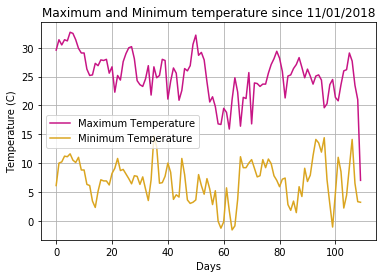

In [12]:
#Graficando
plt.plot(Tmax, label="Maximum Temperature", color = "mediumvioletred")
plt.xlabel("Days")
plt.ylabel("Temperature (C)")
plt.grid()

plt.plot(Tmin, label = "Minimum Temperature", color = "goldenrod")
plt.legend()
plt.title("Maximum and Minimum temperature since 11/01/2018")
plt.savefig("grafica_1",plt=2000)
plt.figure(figsize=(100,100))
plt.show()

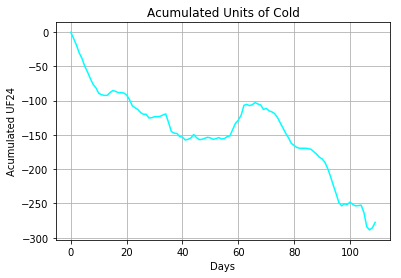

In [16]:
plt.plot(UF24tot, label="Acumulated units of cold", color = "aqua")
plt.xlabel("Days")
plt.ylabel("Acumulated UF24")
plt.grid()

plt.title("Acumulated Units of Cold")
plt.savefig("Frio_Acumulado",plt=2000)
plt.show()

In [14]:
Hora = 0
HF = 0
HFE = 0
count = 0
for i in range(0, len(df2)):
    if(df2["Tmin"][i] < 10):
    for k in range(0, len(df)):
        if(0 < df2["TMean"][k] <= 10):
        HF = HF + 1
        count = count + 1
        elif(count > 23):
        

IndentationError: expected an indented block (<ipython-input-14-40ae9e786aef>, line 7)